**Real Time Machine Learning - Assignment 2**

**Name: Tarun Reddy Challa**

Github Link : https://github.com/tarunreddy03/RTML



In [2]:
!pip install d2l==1.0.0-beta0
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from matplotlib import pyplot as plt
import torch
from torch import nn
from d2l import torch as d2l
!pip install ptflops
import ptflops
from ptflops import get_model_complexity_info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.7 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616822 sha256=fc35e887ab3a6b164ef4940bc111093daa9d935111895a8f31aedad547e518ee
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninsta

In [58]:
def init_cnn(module):
  if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

#initialisation
def __init__(self, max_epochs, num_gpus=1, gradient_clip_val=0):
        self.save_hyperparameters()
        self.train_loss = []
        self.train_acc = []
        self.valid_loss = []
        self.valid_acc = []
        assert num_gpus == 1,'No GPU support yet'
        
@d2l.add_to_class(d2l.Classifier)  
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

#training 
def training_step(self, batch):
  l = self.loss(self(*batch[:-1]), batch[-1])
  self.plot('loss', l, train=True)
  self.train_loss.append(l)
  return l


#validation   
def validation_step(self, batch):
  l = self.loss(self(*batch[:-1]), batch[-1])
  self.valid_loss.append(l)
  self.plot('loss', l, train=False)

#Ploting the map
def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
            metric_type = 'train'
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
            metric_type = 'val'
        self.board.draw(x, d2l.numpy(d2l.to(value, d2l.cpu())),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))
        if not train and self.trainer.epoch % 1 == 0:
          train_loss = self.trainer.train_loss[-1]
          #train_acc = self.trainer.train_acc[-1]
          val_loss = self.trainer.valid_loss[-1]
          #val_acc = self.trainer.valid_acc[-1]
          print(f"Epoch [{self.trainer.epoch+1}/{self.trainer.epochs}]: "
f"train_loss = {train_loss:.4f}, train_acc = {train_acc:.4f}, ")

In [6]:
#fitting the model 
def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()
            self.evaluate()

In [9]:
num_epochs = 10
trainer = d2l.Trainer(max_epochs=num_epochs, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



Base Model:

In [14]:
class avg_pool_softmax_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(num_classes),
            nn.Softmax(dim=1)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x

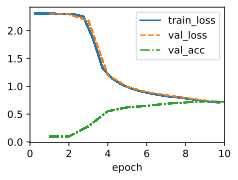

In [15]:
model = base_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [16]:
print('Baseline Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Baseline Model:
base_LeNet(
  123.41 k, 200.000% Params, 858.68 KMac, 100.000% MACs, 
  (conv1): Conv2d(156, 0.253% Params, 122.3 KMac, 14.243% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (act1): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
  (pool1): AvgPool2d(0, 0.000% Params, 4.7 KMac, 0.548% MACs, kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 28.136% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
  (act2): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
  (pool2): AvgPool2d(0, 0.000% Params, 1.6 KMac, 0.186% MACs, kernel_size=2, stride=2, padding=0)
  (flatten): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
  (fc1): Linear(48.12 k, 77.983% Params, 48.12 KMac, 5.604% MACs, in_features=400, out_features=120, bias=True)
  (act3): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
  (fc2): Linear(10.16 k, 16.472% Params, 10.16 KMac, 1.184% MACs, in_features=120, out_features=84, bias=True)

Problem 1: modernize LeNet 

. Replace the average pooling with max-pooling.

. Replace the softmax layer with ReLu.

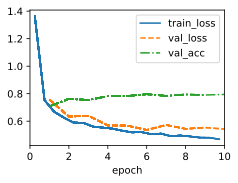

In [17]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()
    
model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [18]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))


Max Pooling Relu Model:
max_pool_relu_LeNet(
  61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
  (net): Sequential(
    61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.253% Params, 122.3 KMac, 28.061% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.079% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.079% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 55.432% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.367% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.367% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 77.983% Params, 48.12 KMac, 11.040% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 1

Conclusion:
The performance of the model was enhanced by swapping out the softmax layer for ReLU and the average pooling for Maxpooling in the LeNet. As can be seen, the training loss has decreased more significantly while the validation accuracy has improved since the second epoch, lowering the validation loss.

Problem 2:

1.Adjust the convolution window size.

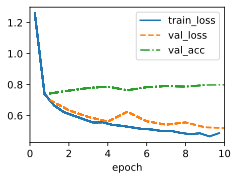

In [19]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()
    
model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [20]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  61.61 k, 100.000% Params, 360.59 KMac, 100.000% MACs, 
  (net): Sequential(
    61.61 k, 100.000% Params, 360.59 KMac, 100.000% MACs, 
    (0): Conv2d(60, 0.097% Params, 47.04 KMac, 13.045% MACs, 1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.305% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.305% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.921% Params, 241.6 KMac, 67.002% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.444% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.444% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 78.104% Params, 48.12 KMac, 13.345% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 12

Conclusion: Reducing the convolution window size didn't make any significient change in the performance compared to base model

2. Adjust number of output channels

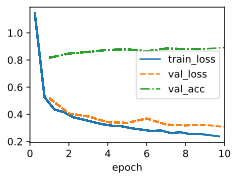

In [22]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10, num_channels=6):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(num_channels * 4, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()
    
model = max_pool_relu_LeNet(num_channels=10)
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1, num_channels=8)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [23]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  113.77 k, 100.000% Params, 932.55 KMac, 100.000% MACs, 
  (net): Sequential(
    113.77 k, 100.000% Params, 932.55 KMac, 100.000% MACs, 
    (0): Conv2d(208, 0.183% Params, 163.07 KMac, 17.487% MACs, 1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 6.27 KMac, 0.673% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 6.27 KMac, 0.673% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6.43 k, 5.653% Params, 643.2 KMac, 68.972% MACs, 8, 32, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 3.2 KMac, 0.343% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 3.2 KMac, 0.343% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(96.12 k, 84.483% Params, 96.12 KMac, 10.307% MACs, in_features=800, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Para

Conclusion: By increasing the output channels in the second layer from 16 to 24. The performance has improved notiably

3. Adjust number of convolutional layers


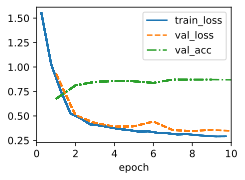

In [26]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(12, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()
    
model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [27]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  24.28 k, 100.000% Params, 514.51 KMac, 100.000% MACs, 
  (net): Sequential(
    24.28 k, 100.000% Params, 514.51 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.643% Params, 122.3 KMac, 23.771% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 0.914% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 0.914% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 9.951% Params, 241.6 KMac, 46.957% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.311% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.311% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(4.81 k, 19.820% Params, 120.3 KMac, 23.381% MACs, 16, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU(0, 0.000% Params, 300.0 Mac, 0.058% MACs, )
    (8): MaxPool2d(0, 0.000% Params, 300.0 Ma

Conclusion: Adjusting the convolutional layers in the Baseline LeNet model haven't made any improvement in the output.

4. Adjust number of fully connected layers

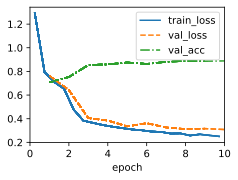

In [28]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(64),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()

model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [29]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  66.95 k, 100.000% Params, 441.15 KMac, 100.000% MACs, 
  (net): Sequential(
    66.95 k, 100.000% Params, 441.15 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.233% Params, 122.3 KMac, 27.724% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.066% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.066% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.609% Params, 241.6 KMac, 54.765% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.363% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.363% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 71.879% Params, 48.12 KMac, 10.908% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 1

In [30]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()

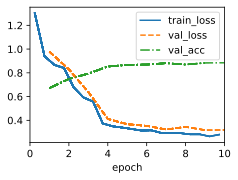

In [31]:
model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [32]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  51.9 k, 100.000% Params, 425.96 KMac, 100.000% MACs, 
  (net): Sequential(
    51.9 k, 100.000% Params, 425.96 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.301% Params, 122.3 KMac, 28.712% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.104% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.104% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 4.655% Params, 241.6 KMac, 56.719% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.376% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.376% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 92.713% Params, 48.12 KMac, 11.297% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 120

Conclusion: In this instance, we built a fully connected layer with 64 units to test the model's performance. When compared to the baseline model, it is seen that the model's accuracy has decreased. A completely connected layer can be removed to enhance model performance.

5. Explore the learning rates:

incrasing learning rate to 0.2

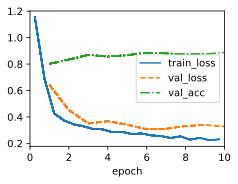

In [33]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.2, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()
    
model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.2)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [34]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
  (net): Sequential(
    61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.253% Params, 122.3 KMac, 28.061% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.079% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.079% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 55.432% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.367% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.367% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 77.983% Params, 48.12 KMac, 11.040% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 1

incrasing learning rate to 0.3

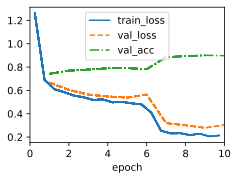

In [35]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.3, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()
    
model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.3)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [36]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
  (net): Sequential(
    61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.253% Params, 122.3 KMac, 28.061% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.079% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.079% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 55.432% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.367% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.367% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 77.983% Params, 48.12 KMac, 11.040% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 1

Conclusion: By the application, we got to know that Increasing the learning rates will increase the performance of the model. 

**Problem 3. Add Dropouts to models from Problem 2**

1. Convolution window with dropout of 0.4

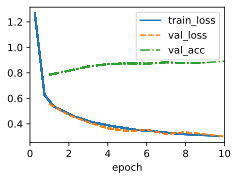

In [37]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model with dropout."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.Dropout(0.4),  # add dropout with probability 0.4
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()
    
model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [38]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  61.61 k, 100.000% Params, 360.59 KMac, 100.000% MACs, 
  (net): Sequential(
    61.61 k, 100.000% Params, 360.59 KMac, 100.000% MACs, 
    (0): Conv2d(60, 0.097% Params, 47.04 KMac, 13.045% MACs, 1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.305% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.305% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.921% Params, 241.6 KMac, 67.002% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.444% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.444% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 78.104% Params, 48.12 KMac, 13.345% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 12

2. Adjust the output channels with drop out of 0.4

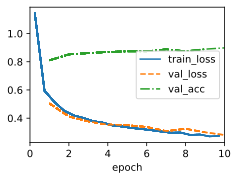

In [40]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10, num_channels=6):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(num_channels * 4, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()
    
model = max_pool_relu_LeNet(num_channels=10)
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1, num_channels=8)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [41]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  113.77 k, 100.000% Params, 932.55 KMac, 100.000% MACs, 
  (net): Sequential(
    113.77 k, 100.000% Params, 932.55 KMac, 100.000% MACs, 
    (0): Conv2d(208, 0.183% Params, 163.07 KMac, 17.487% MACs, 1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 6.27 KMac, 0.673% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 6.27 KMac, 0.673% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6.43 k, 5.653% Params, 643.2 KMac, 68.972% MACs, 8, 32, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 3.2 KMac, 0.343% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 3.2 KMac, 0.343% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(96.12 k, 84.483% Params, 96.12 KMac, 10.307% MACs, in_features=800, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Para

3. Adjust the number of convolutional layers with drop out of 0.4

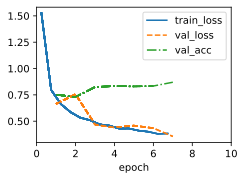

In [ ]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(12, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()
    
model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [ ]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

4. Adjust the number of fully connected layers with the drop out of 0.4

In [ ]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.LazyLinear(64),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()

model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [ ]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

In [ ]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()

model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [ ]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

5. Explore the learning rates with dropout of 0.4

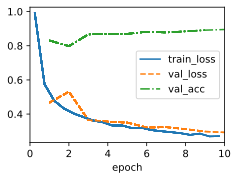

In [59]:
class max_pool_relu_LeNet(d2l.Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.2, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.ReLU(),
            nn.LazyLinear(84),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.LazyLinear(num_classes)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x.relu()
    
model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

model = max_pool_relu_LeNet(lr=0.2)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

In [61]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
  (net): Sequential(
    61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.253% Params, 122.3 KMac, 28.061% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.079% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.079% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 55.432% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.367% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.367% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 77.983% Params, 48.12 KMac, 11.040% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 1

Conclusion: Adding the dropout to the training models will improve the performance

Problem 4: Use ALexNet

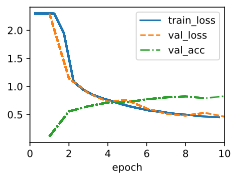

In [3]:
class baseline_AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size =11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes)
        )
        self.net.apply(d2l.init_cnn)
        

baseline_AlexNet().layer_summary((1, 1, 224, 224))

model = baseline_AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224,224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

In [4]:
print('Baseline AlexNet Model:')
macs, params = get_model_complexity_info(model, (1, 224, 224))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))


Baseline AlexNet Model:
baseline_AlexNet(
  46.76 M, 100.000% Params, 939.85 MMac, 100.000% MACs, 
  (net): Sequential(
    46.76 M, 100.000% Params, 939.85 MMac, 100.000% MACs, 
    (0): Conv2d(11.71 k, 0.025% Params, 34.15 MMac, 3.634% MACs, 1, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 279.94 KMac, 0.030% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 279.94 KMac, 0.030% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(614.66 k, 1.314% Params, 415.51 MMac, 44.210% MACs, 96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(0, 0.000% Params, 173.06 KMac, 0.018% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 173.06 KMac, 0.018% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(885.12 k, 1.893% Params, 127.46 MMac, 13.561% MACs, 256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(0, 0.000% Params, 55.3 KMac, 0.006% MACs, )
    (

Simplifies version of the AlexNet:

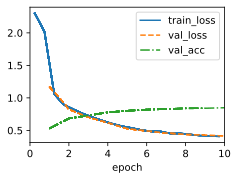

In [7]:
class baseline_AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(64, kernel_size =11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(128, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(1024), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes)
        )
        self.net.apply(d2l.init_cnn)
        

baseline_AlexNet().layer_summary((1, 1, 224, 224))

model = baseline_AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224,224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

In [8]:
print('Simplified AlexNet Model:')
macs, params = get_model_complexity_info(model, (1, 224, 224))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))


Simplified AlexNet Model:
baseline_AlexNet(
  4.68 M, 100.000% Params, 335.21 MMac, 100.000% MACs, 
  (net): Sequential(
    4.68 M, 100.000% Params, 335.21 MMac, 100.000% MACs, 
    (0): Conv2d(7.81 k, 0.167% Params, 22.77 MMac, 6.792% MACs, 1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 186.62 KMac, 0.056% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 186.62 KMac, 0.056% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(204.93 k, 4.378% Params, 138.53 MMac, 41.327% MACs, 64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(0, 0.000% Params, 86.53 KMac, 0.026% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 86.53 KMac, 0.026% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(295.17 k, 6.306% Params, 42.5 MMac, 12.680% MACs, 128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(0, 0.000% Params, 36.86 KMac, 0.011% MACs, )
    (8): 

Conclusion: The validation and training loss have been significantly reduced by the Simplified AlexNet, enhancing accuracy. In comparison to the top models in Problems 2 and 3, the condensed AlexNet model has likewise demonstrated superior model performance.

Problem 5: Design a better model that works directly on 28 * 28 images with better accuracy than AlexNet

In [21]:
data = d2l.FashionMNIST(batch_size=128)
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(768), nn.ReLU(), nn.Dropout(0.3),
            nn.LazyLinear(512), nn.ReLU(), nn.Dropout(0.3), 
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)
VGG(arch=(((1, 32), (1, 64), (2, 128), (2, 256)))).layer_summary(
    (1, 1, 28, 28))

Sequential output shape:	 torch.Size([1, 32, 14, 14])
Sequential output shape:	 torch.Size([1, 64, 7, 7])
Sequential output shape:	 torch.Size([1, 128, 3, 3])
Sequential output shape:	 torch.Size([1, 256, 1, 1])
Flatten output shape:	 torch.Size([1, 256])
Linear output shape:	 torch.Size([1, 768])
ReLU output shape:	 torch.Size([1, 768])
Dropout output shape:	 torch.Size([1, 768])
Linear output shape:	 torch.Size([1, 512])
ReLU output shape:	 torch.Size([1, 512])
Dropout output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 10])


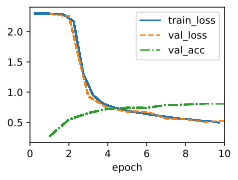

In [22]:
model = VGG(arch=(((1, 16), (1, 32), (2, 64), (2, 128))), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [23]:
print('Model Complexity:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Model Complexity:
VGG(
  779.59 k, 100.000% Params, 6.29 MMac, 100.000% MACs, 
  (net): Sequential(
    779.59 k, 100.000% Params, 6.29 MMac, 100.000% MACs, 
    (0): Sequential(
      160, 0.021% Params, 150.53 KMac, 2.392% MACs, 
      (0): Conv2d(160, 0.021% Params, 125.44 KMac, 1.993% MACs, 1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(0, 0.000% Params, 12.54 KMac, 0.199% MACs, )
      (2): MaxPool2d(0, 0.000% Params, 12.54 KMac, 0.199% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      4.64 k, 0.595% Params, 921.98 KMac, 14.650% MACs, 
      (0): Conv2d(4.64 k, 0.595% Params, 909.44 KMac, 14.451% MACs, 16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(0, 0.000% Params, 6.27 KMac, 0.100% MACs, )
      (2): MaxPool2d(0, 0.000% Params, 6.27 KMac, 0.100% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      55.42 k, 7.109% Params, 

Conclusion: In the 28*28 pictures, the VGG model demonstrated superior accuracy to the AlexNet model while having less theoretical complexity.